<a href="https://colab.research.google.com/github/faizankshaikh/AV_Article_Codes/blob/master/NN_From_Scratch/improvements/NN_From_Scratch_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps to build a Neural Network in NumPy

> #### 1. Load the dataset 
> #### 2. Define architecture of the model 
> #### 3. Initialize the parameters
> #### 4. Implement forward propagation
> #### 5. Implement backward propagation
> #### 6. Train the model for multiple epochs 

---

### 1. Load the dataset 

In [1]:
# importing required libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# version of numpy library
print("Version of numpy:", np.__version__)

Version of numpy: 1.18.5


In [3]:
# version of matplotlib library
import matplotlib

print("Version of matplotlib:", matplotlib.__version__)

Version of matplotlib: 3.2.2


In [4]:
# set random seed
np.random.seed(42)

In [5]:
# creating the input array
X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

print("Input:\n", X)

# shape of input array
print("\nShape of Input:", X.shape)

Input:
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

Shape of Input: (3, 4)


In [6]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

Shape of Input Matrix: (4, 3)


In [7]:
# creating the output array
y = np.array([[1], [1], [0]])

print("Actual Output:\n", y)

# output in matrix form
y = y.T

print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


## 2. Define architecture of the model 

In [8]:
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

![alt text](https://github.com/faizankshaikh/AV_Article_Codes/blob/master/NN_From_Scratch/improvements/images/model_architecture.png?raw=1)

## 3. Initialize the parameters

NOTE: For simplicity, we are assuming that the bias for all the layers is 0

In [9]:
# initializing weight
# Shape of weights_input_hidden should number of neurons at input layer * number of neurons at hidden layer
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))

# Shape of weights_hidden_output should number of neurons at hidden layer * number of neurons at output layer
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

In [10]:
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape

((4, 3), (3, 1))

## 4. Implement forward propagation

In [11]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

![alt text](https://github.com/faizankshaikh/AV_Article_Codes/blob/master/NN_From_Scratch/improvements/images/hidden_layer_activations.png?raw=1)

In [12]:
# hidden layer activations

hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

![alt text](https://drive.google.com/uc?id=1ETMoLD1fwi5u1HHLqtAdVUs-P8HNOU_p)

In [13]:
# calculating the output
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

In [14]:
# output
output

array([[0.68334694, 0.72697078, 0.71257368]])

## 5. Implement backward propagation

![alt text](https://github.com/faizankshaikh/AV_Article_Codes/blob/master/NN_From_Scratch/improvements/images/error.png?raw=1)

In [15]:
# calculating error
error = np.square(y - output) / 2
error

array([[0.05013458, 0.03727248, 0.25388062]])

### Rate of change of error w.r.t weight between hidden and output layer

![alt text](https://github.com/faizankshaikh/AV_Article_Codes/blob/master/NN_From_Scratch/improvements/images/error_wrt_who.png?raw=1)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**

In [16]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [17]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [18]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

In [19]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_outputLayer_LinearTransform.shape, outputLayer_LinearTransform_wrt_weights_hidden_output.shape

((1, 3), (1, 3), (3, 3))

In [20]:
# shape of weights of output layer
weights_hidden_output.shape

(3, 1)

![alt text](https://github.com/faizankshaikh/AV_Article_Codes/blob/master/NN_From_Scratch/improvements/images/error_wrt_who_matrix.png?raw=1)

In [21]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
)

In [22]:
error_wrt_weights_hidden_output.shape

(3, 1)

### Rate of change of error w.r.t weight between input and hidden layer

![alt text](https://github.com/faizankshaikh/AV_Article_Codes/blob/master/NN_From_Scratch/improvements/images/error_wrt_wih.png?raw=1)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t hidden layer activations**

**d. Rate of change of hidden layer activations w.r.t Z1**

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

In [23]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [24]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [25]:
# rate of change of Z2 w.r.t. hidden layer activations
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output

In [26]:
# rate of change of hidden layer activations w.r.t. Z1
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
)

In [27]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X

In [28]:
# checking the shapes of partial derivatives
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 3) (1, 3) (3, 1) (3, 3) (4, 3)


In [29]:
# shape of weights of hidden layer
weights_input_hidden.shape

(4, 3)

![alt text](https://drive.google.com/uc?id=1RkG5x1NEFWlF3tj0OlswOWvBcV5XNV1C)

In [30]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)

In [31]:
error_wrt_weights_input_hidden.shape

(4, 3)

### Update the parameters

![alt text](https://drive.google.com/uc?id=1A5jaB3WjZx9yrJkk9imVEvP3PZodjapE)

In [32]:
# defining the learning rate
lr = 0.01

In [33]:
# initial weights_hidden_output
weights_hidden_output

array([[0.83244264],
       [0.21233911],
       [0.18182497]])

In [34]:
# initial weights_input_hidden
weights_input_hidden

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]])

In [35]:
# updating the weights of output layer
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output

In [36]:
# updating the weights of hidden layer
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

In [37]:
# updated weights_hidden_output
weights_hidden_output

array([[0.83211079],
       [0.21250681],
       [0.18167831]])

In [38]:
# updated weights_input_hidden
weights_input_hidden

array([[0.37476062, 0.95075719, 0.7320294 ],
       [0.59845481, 0.15594177, 0.15594545],
       [0.05816641, 0.86618978, 0.60112315],
       [0.70795169, 0.02052126, 0.96986892]])

## 6. Train the model for multiple epochs

In [39]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 1000

In [40]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.11553
Error at epoch 100 is 0.11082
Error at epoch 200 is 0.10606
Error at epoch 300 is 0.09845
Error at epoch 400 is 0.08483
Error at epoch 500 is 0.06396
Error at epoch 600 is 0.04206
Error at epoch 700 is 0.02641
Error at epoch 800 is 0.01719
Error at epoch 900 is 0.01190


In [41]:
# updated w_ih
weights_input_hidden

array([[ 1.25679149,  1.72312858, -0.27336634],
       [-1.07615756, -1.73777864,  1.42316207],
       [ 0.63053865,  0.88090942, -0.03448117],
       [-0.56098781, -0.65506704,  0.61013995]])

In [42]:
# updated w_ho
weights_hidden_output

array([[ 1.45176252],
       [ 2.59109536],
       [-2.18347501]])

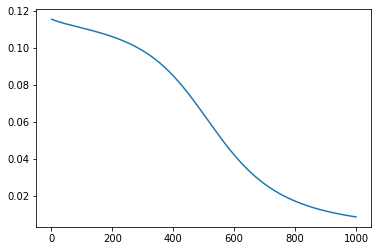

In [43]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [44]:
# final output from the model
output

array([[0.9155779 , 0.89643511, 0.18608711]])

In [45]:
# actual target
y

array([[1, 1, 0]])

---

In [46]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

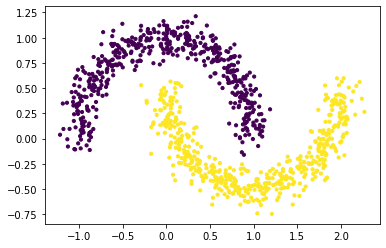

In [47]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

In [48]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [49]:
X -= X.min()
X /= X.max()

In [50]:
X.min(), X.max()

(0.0, 1.0)

In [51]:
np.unique(y)

array([0, 1])

In [52]:
X.shape, y.shape

((1000, 2), (1000,))

In [53]:
X = X.T

y = y.reshape(1, -1)

In [54]:
X.shape, y.shape

((2, 1000), (1, 1000))

In [55]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.23478
Error at epoch 1000 is 0.25000
Error at epoch 2000 is 0.25000
Error at epoch 3000 is 0.25000
Error at epoch 4000 is 0.05129
Error at epoch 5000 is 0.02163
Error at epoch 6000 is 0.01157
Error at epoch 7000 is 0.00745
Error at epoch 8000 is 0.00713
Error at epoch 9000 is 0.00642


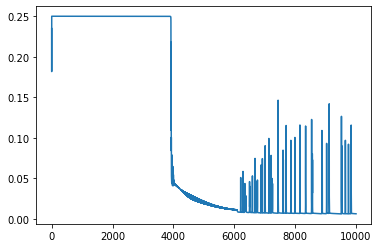

In [56]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [57]:
# final output from the model
output[:, :5]

array([[9.64781360e-01, 9.98834309e-01, 9.95018421e-01, 9.99193286e-01,
        9.11292450e-08]])

In [58]:
y[:, :5]

array([[1, 1, 1, 1, 0]])

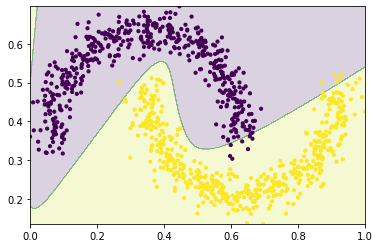

In [59]:
# Define region of interest by data limits
steps = 1000
x_span = np.linspace(X[0, :].min(), X[0, :].max(), steps)
y_span = np.linspace(X[1, :].min(), X[1, :].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
ax.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())